In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import torch
import gpytorch
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import tqdm
import utils as utils
import scienceplots
plt.style.use('science')

base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

import fit_FaIRGP as fairgp

<IPython.core.display.Javascript object>

In [3]:
train_cfg = {'dataset' : {'dirpath': '../data/', 
                          'keys': ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']}
            }
train_data = fairgp.make_data(train_cfg)
scenario_dataset = train_data.scenarios

In [4]:
choice = 'viridis'
cmap = matplotlib.cm.get_cmap(choice)
cwheel = [cmap(0.), cmap(0.4), cmap(0.6), cmap(0.8), cmap(0.95)]


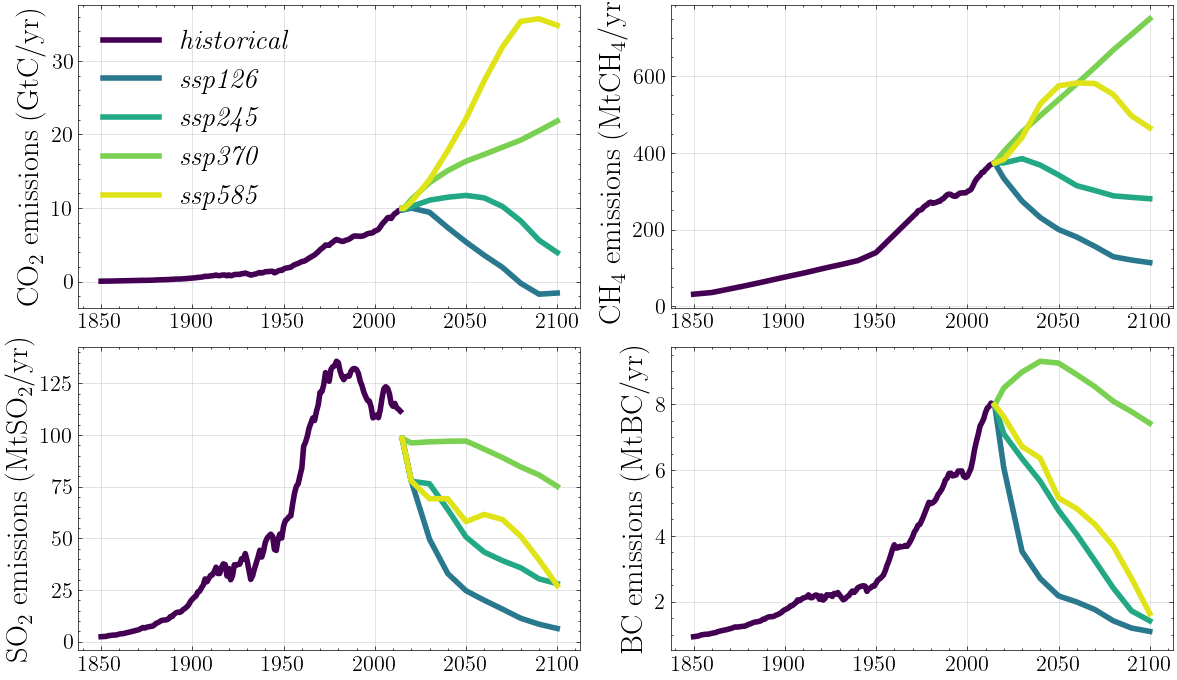

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))



for i, scenario in enumerate(scenario_dataset.scenarios.values()):
    ax[0, 0].plot(scenario.timesteps,
                  scenario.emissions[:, 0],
                  lw=4, color=cwheel[i], label=f'$\it {scenario.name.lower()}$')
    ax[0, 1].plot(scenario.timesteps,
                  scenario.emissions[:, 1],
                  lw=4, color=cwheel[i])
    ax[1, 0].plot(scenario.timesteps,
                  scenario.emissions[:, 2],
                  lw=4, color=cwheel[i])
    ax[1, 1].plot(scenario.timesteps,
                  scenario.emissions[:, 3],
                  lw=4, color=cwheel[i])

    
    

ax[0, 0].set_ylabel(r'CO$_2$ emissions (GtC/yr)', fontsize=22)
ax[0, 0].tick_params(labelsize=16)
ax[0, 0].grid(alpha=0.5)
legend = ax[0, 0].legend(fontsize=20, loc='upper left')


ax[0, 1].set_ylabel(r'CH$_4$ emissions (MtCH$_4$/yr)', fontsize=22)
ax[0, 1].tick_params(labelsize=16)
ax[0, 1].grid(alpha=0.5)

ax[1, 0].set_ylabel(r'SO$_2$ emissions (MtSO$_2$/yr)', fontsize=22)
ax[1, 0].tick_params(labelsize=16)
ax[1, 0].grid(alpha=0.5)

ax[1, 1].set_ylabel('BC emissions (MtBC/yr)', fontsize=22)
ax[1, 1].tick_params(labelsize=16)
ax[1, 1].grid(alpha=0.5)

plt.tight_layout()
plt.savefig('./figures/presentation-emission-dataset.png', dpi=200)
plt.show()